# Multi Layer Perceptron (MLP)

In this notebook, I am training a multi leayered neural network (shallow network) to explore Keras

## Data Description

I am using Ionosphere Data Set data set from the UCI machine learning repository. The data set has two labels: good and bad. We will define a 3-layer neural network in keras to train the model in order to make binary-class classification.

In [28]:
# loading required libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# reading dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data'
df = pd.read_csv(url, index_col=None, header=None)
df.shape

(351, 35)

In [3]:
# train test split
np.random.seed(1)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = np.where(y=='g', 0, 1)

In [4]:
# defining nn architecture in keras
model = Sequential()
model.add(Dense(units=12, input_dim=34, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [5]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# fit model
history = model.fit(x, y, validation_split=0.2, epochs=30, batch_size=32, verbose=0)
print(history.history.keys())

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


Text(0.5,1,'Training Loss and Validation Loss')

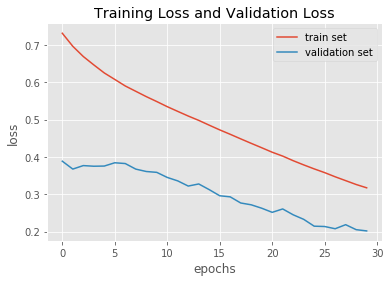

In [29]:
# Visualizing loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Training Loss and Validation Loss')

In [9]:
#model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
#saving model image for visualization
plot_model(model, to_file='binary_classification_nn.png', show_shapes=True, show_layer_names=True)

### visualizing the saved image of the model

<img src="binary_classification_nn.png">

In [16]:
#saving trained model
model.save('model_v1.h5')
model_v1 = load_model('model_v1.h5')
print(model_v1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
None


In order to confirm if the learned weights of our trained model and saved models are exactly same, we can compare
weights array of both models.

In [27]:
#comparing weights
[i.all() == j.all() for i,j in zip(model.get_weights(), model_v1.get_weights())]

[True, True, True, True, True, True]

seems like all weights are same. So we can save our trained model and load it later on to make predictions or make any further improvements to existing architecture.